## Explore the columns with a lot of words in them to see what I want to use from them

In [63]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib notebook

In [77]:
# load the data
final_dir = r'/Users/ckrasnia/Documents/application_materials/rental_data'
data = pd.read_csv(os.path.join(final_dir,'raw_US_listings.csv'))


In [78]:
print(len(data))
data.keys()

498225


Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm',

It looks like a lot of the text in the descriptions and titles includes some markdown formatting, like brakes and bold, I want to remove that, also make everything lower case before hand so that I am not getting duplicates with different cases

In [79]:
def remove_md(string):
    """
    function to remove angled brackets (< & >) and the markdown formatting inside them from strings. Should remove anything
    between two angled brackets, anything before a close bracket if there is only a close bracket, and anything after an 
    open bracket if there is only an open bracket
    
    Input : str
    output : str
    """
    # if both an open and close angle brackets are in the string
    if ('<' in string) and ('>' in string):
        open_brac = string.find('<')
        close_brac = string.find('>')
        # if there is something inside the brackets, drop that including the brackets
        if open_brac < close_brac:
            string = string.replace(string[open_brac : close_brac + 1],"")
        # if there isn't anything in between them, drop everything before and after
        else:
            string = string.replace(string[:close_brac+1],"")
            string = string.replace(string[open_brac:],"")
        # use recursion to fix any instances where there are multiple opens and closes
        return remove_md(string)
    elif ('<' in string):
        open_brac = string.find('<')
        string = string.replace(string[open_brac:],"")
        return remove_md(string)
    elif ('>' in string):
        close_brac = string.find('>')
        string = string.replace(string[:close_brac+1],"")
        return remove_md(string)
    else:
        return string
    
def clean_chars(string):
    """
    remove unwanted characters from strings such as punctuation and 
    """

/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ckrasnia/opt/anaconda3/envs/ds_default/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


<IPython.core.display.Javascript object>


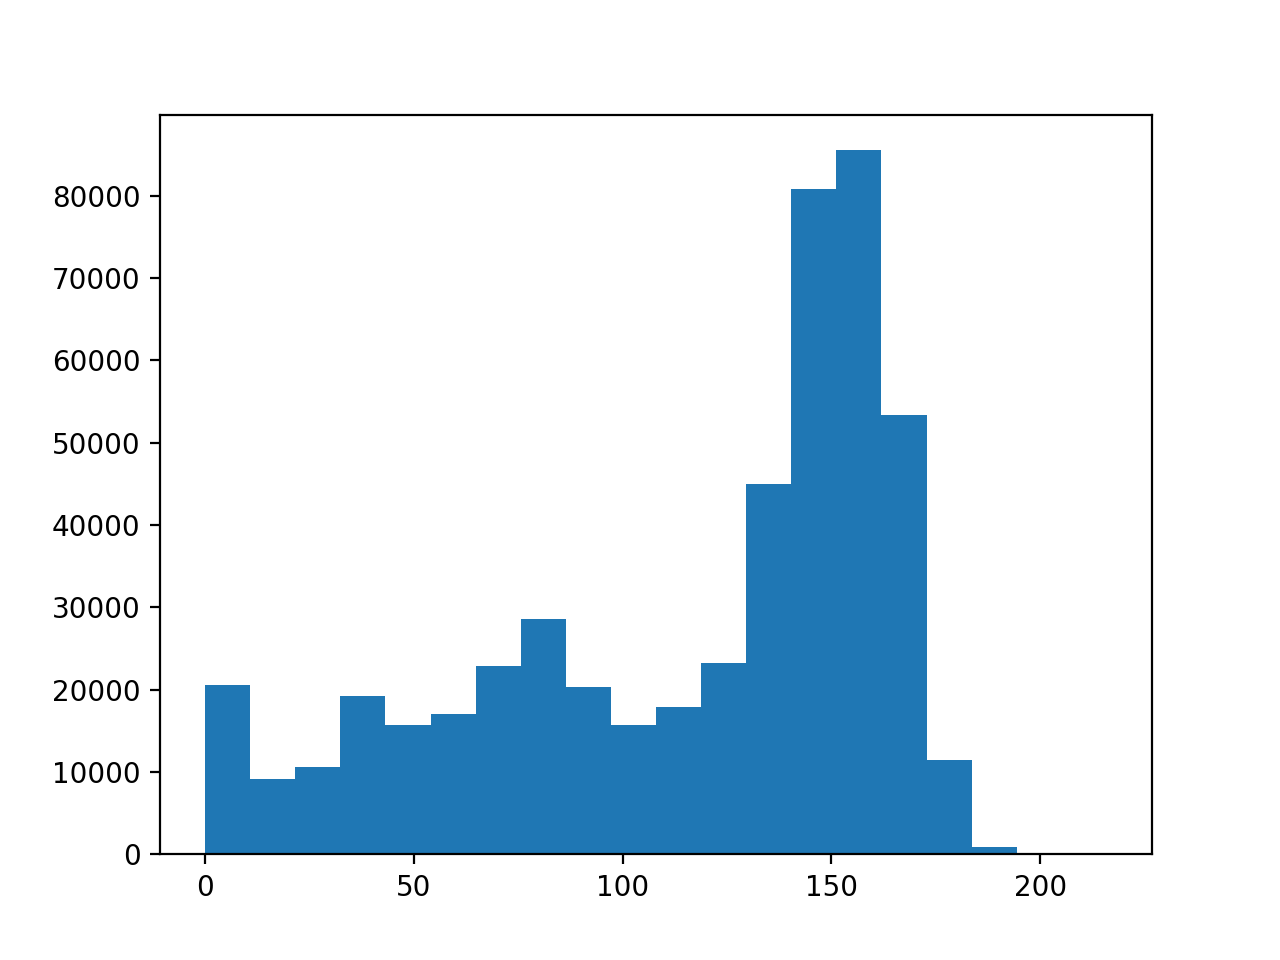

(array([2.0594e+04, 9.1870e+03, 1.0584e+04, 1.9227e+04, 1.5726e+04,
        1.7059e+04, 2.2862e+04, 2.8644e+04, 2.0288e+04, 1.5744e+04,
        1.7904e+04, 2.3245e+04, 4.5017e+04, 8.0869e+04, 8.5520e+04,
        5.3387e+04, 1.1431e+04, 9.1800e+02, 1.6000e+01, 3.0000e+00]),
 array([  0. ,  10.8,  21.6,  32.4,  43.2,  54. ,  64.8,  75.6,  86.4,
         97.2, 108. , 118.8, 129.6, 140.4, 151.2, 162. , 172.8, 183.6,
        194.4, 205.2, 216. ]),
 <BarContainer object of 20 artists>)

In [81]:
# the description is probably going to be the most useful, just start by seeing how many words are usually in the descriptions
# going to make all lower case, remove common html/markdown formatting and split words on spaces 
# seems like some of the descriptions are probably NaN since I am getting a float error, so I'll change those to an empty string
data['description'][data['description'].isna()] = ''
descript_words = data['description'].str.lower().apply(remove_md)
#also going to want to remove some punctuation
illegal_chars = "[.,]"
descript_words=descript_words.str.replace("[.,]","")
descript_words=descript_words.str.split()
#
# descript_words[descript_words.isna()] = ['']
plt.hist(descript_words.apply(len), bins=20)
# we have quite a few words here... lets see if any are both common and relatively useful

In [82]:
# first get the words from a subset of the data into a single list
dw_list = [w for j in descript_words.iloc[:10000] for w in j]
u,cts = np.unique(dw_list, return_counts=True)

In [108]:
#see wjat the most common words are from this subset to find stop words to exclude
u[np.argsort(cts)[-1000:]]
stop_words = ['this', 'from', 'you', 'for', 'of', 'with', 'is', 'in', 'to', 'a','the', 'and', 'are', 'your', 
              'has', 'on', 'have', 'or', '&', 'will', 'as', 'at', 'it', '-', 'so', '•', 'i', '+','(eg', '|',]

array(['spots', 'fit', 'items', 'countertops', 'safeway', 'enjoying',
       'lush', 'streets', 'anywhere', 'maximum', 'choose', 'onsite',
       'century', 'above', 'shampoo', 'party', 'base', 'marble', 'basic',
       'stroll', 'antique', 'enough', 'closed', 'on-site:', 'tree',
       'still', 'crescent', 'guidelines', 'willow', 'note:', 'levi',
       'without', 'hair', 'walkable', 'campbell', 'fine', 'lake',
       'hospital', 'run', 'southern', 'space1', 'cool', 'heating',
       'multiple', 'neighborhoods', 'conditioner', 'history',
       '19-ostr-0000', 'means', 'ideally', 'personal', '24', 'does',
       'machine', 'loyola', 'ensure', 'suites', 'dishes', 'streaming',
       'theater', 'now', 'even', 'price', 'reservation', 'fenced', 'sun',
       'quite', '(with', 'same', 'read', 'hour', 'pillows', 'mid-city',
       'architecture', 'discover', 'gatos', 'adjacent', 'meals',
       'speaker', 'stunning', 'quaint', 'off-street', 'board', 'five',
       'restaurant', 'superior', 

In [87]:
np.sort(cts)[-100:]

array([ 1768,  1786,  1801,  1828,  1837,  1860,  1862,  1868,  1892,
        1935,  1963,  1966,  1975,  1994,  2019,  2020,  2026,  2035,
        2045,  2092,  2099,  2198,  2206,  2215,  2236,  2284,  2315,
        2351,  2363,  2392,  2417,  2426,  2429,  2429,  2496,  2509,
        2510,  2511,  2543,  2571,  2587,  2665,  2695,  2698,  2729,
        2778,  2784,  2869,  2923,  3025,  3057,  3068,  3173,  3208,
        3264,  3266,  3350,  3417,  3543,  3586,  3640,  3697,  3708,
        3733,  3830,  4014,  4073,  4101,  4180,  4324,  4468,  4728,
        4955,  5079,  5181,  5383,  5727,  5741,  5752,  5757,  5847,
        6169,  6282,  6460,  6830,  7416,  8084,  8199,  8304,  8663,
       10741, 12197, 17182, 20200, 20775, 20952, 31183, 31370, 49121,
       50761])

In [32]:
        start = string.find('<')
        end = string.find('>')

In [110]:
porter = PorterStemmer()
porter.stem('sweeten)',0)

'sweeten)'

In [88]:
descript_words.iloc[:10]

0    [custom, built, studio, with, exquisite, desig...
1    [room, in, gracious, home, with, beautiful, ga...
2    [we, live, in, a, safe, community, close, to, ...
3    [we, live, in, a, safe, quiet, community, clos...
4    [spacious, book, filled, room, standing, desk,...
5    [room, in, gracious, home, with, beautiful, ga...
6    [luxurious, apt, in, quiet, neighborhood–beaut...
7    [attention, travelers:, please, inquire, about...
8    [the, spaceonly, minutes, from, the, sj, airpo...
9    [set, in, a, small, home, vineyard, in, a, qui...
Name: description, dtype: object

In [99]:

"""Porter Stemming Algorithm
This is the Porter stemming algorithm, ported to Python from the
version coded up in ANSI C by the author. It may be be regarded
as canonical, in that it follows the algorithm presented in

Porter, 1980, An algorithm for suffix stripping, Program, Vol. 14,
no. 3, pp 130-137,

only differing from it at the points maked --DEPARTURE-- below.

See also http://www.tartarus.org/~martin/PorterStemmer

The algorithm as described in the paper could be exactly replicated
by adjusting the points of DEPARTURE, but this is barely necessary,
because (a) the points of DEPARTURE are definitely improvements, and
(b) no encoding of the Porter stemmer I have seen is anything like
as exact as this version, even with the points of DEPARTURE!

Vivake Gupta (v@nano.com)

Release 1: January 2001

Further adjustments by Santiago Bruno (bananabruno@gmail.com)
to allow word input not restricted to one word per line, leading
to:

release 2: July 2008

Modified by CSK to more easily take single words as input May 2022
"""

import sys

class PorterStemmer:

    def __init__(self):
        """The main part of the stemming algorithm starts here.
        b is a buffer holding a word to be stemmed. The letters are in b[k0],
        b[k0+1] ... ending at b[k]. In fact k0 = 0 in this demo program. k is
        readjusted downwards as the stemming progresses. Zero termination is
        not in fact used in the algorithm.

        Note that only lower case sequences are stemmed. Forcing to lower case
        should be done before stem(...) is called.
        """

        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string

    def cons(self, i):
        """cons(i) is TRUE <=> b[i] is a consonant."""
        if self.b[i] == 'a' or self.b[i] == 'e' or self.b[i] == 'i' or self.b[i] == 'o' or self.b[i] == 'u':
            return 0
        if self.b[i] == 'y':
            if i == self.k0:
                return 1
            else:
                return (not self.cons(i - 1))
        return 1

    def m(self):
        """m() measures the number of consonant sequences between k0 and j.
        if c is a consonant sequence and v a vowel sequence, and <..>
        indicates arbitrary presence,

           <c><v>       gives 0
           <c>vc<v>     gives 1
           <c>vcvc<v>   gives 2
           <c>vcvcvc<v> gives 3
           ....
        """
        n = 0
        i = self.k0
        while 1:
            if i > self.j:
                return n
            if not self.cons(i):
                break
            i = i + 1
        i = i + 1
        while 1:
            while 1:
                if i > self.j:
                    return n
                if self.cons(i):
                    break
                i = i + 1
            i = i + 1
            n = n + 1
            while 1:
                if i > self.j:
                    return n
                if not self.cons(i):
                    break
                i = i + 1
            i = i + 1

    def vowelinstem(self):
        """vowelinstem() is TRUE <=> k0,...j contains a vowel"""
        for i in range(self.k0, self.j + 1):
            if not self.cons(i):
                return 1
        return 0

    def doublec(self, j):
        """doublec(j) is TRUE <=> j,(j-1) contain a double consonant."""
        if j < (self.k0 + 1):
            return 0
        if (self.b[j] != self.b[j-1]):
            return 0
        return self.cons(j)

    def cvc(self, i):
        """cvc(i) is TRUE <=> i-2,i-1,i has the form consonant - vowel - consonant
        and also if the second c is not w,x or y. this is used when trying to
        restore an e at the end of a short  e.g.

           cav(e), lov(e), hop(e), crim(e), but
           snow, box, tray.
        """
        if i < (self.k0 + 2) or not self.cons(i) or self.cons(i-1) or not self.cons(i-2):
            return 0
        ch = self.b[i]
        if ch == 'w' or ch == 'x' or ch == 'y':
            return 0
        return 1

    def ends(self, s):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""
        length = len(s)
        if s[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length > (self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != s:
            return 0
        self.j = self.k - length
        return 1

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
        self.k = self.j + length

    def r(self, s):
        """r(s) is used further down."""
        if self.m() > 0:
            self.setto(s)

    def step1ab(self):
        """step1ab() gets rid of plurals and -ed or -ing. e.g.

           caresses  ->  caress
           ponies    ->  poni
           ties      ->  ti
           caress    ->  caress
           cats      ->  cat

           feed      ->  feed
           agreed    ->  agree
           disabled  ->  disable

           matting   ->  mat
           mating    ->  mate
           meeting   ->  meet
           milling   ->  mill
           messing   ->  mess

           meetings  ->  meet
        """
        if self.b[self.k] == 's':
            if self.ends("sses"):
                self.k = self.k - 2
            elif self.ends("ies"):
                self.setto("i")
            elif self.b[self.k - 1] != 's':
                self.k = self.k - 1
        if self.ends("eed"):
            if self.m() > 0:
                self.k = self.k - 1
        elif (self.ends("ed") or self.ends("ing")) and self.vowelinstem():
            self.k = self.j
            if self.ends("at"):   self.setto("ate")
            elif self.ends("bl"): self.setto("ble")
            elif self.ends("iz"): self.setto("ize")
            elif self.doublec(self.k):
                self.k = self.k - 1
                ch = self.b[self.k]
                if ch == 'l' or ch == 's' or ch == 'z':
                    self.k = self.k + 1
            elif (self.m() == 1 and self.cvc(self.k)):
                self.setto("e")

    def step1c(self):
        """step1c() turns terminal y to i when there is another vowel in the stem."""
        if (self.ends("y") and self.vowelinstem()):
            self.b = self.b[:self.k] + 'i' + self.b[self.k+1:]

    def step2(self):
        """step2() maps double suffices to single ones.
        so -ization ( = -ize plus -ation) maps to -ize etc. note that the
        string before the suffix must give m() > 0.
        """
        if self.b[self.k - 1] == 'a':
            if self.ends("ational"):   self.r("ate")
            elif self.ends("tional"):  self.r("tion")
        elif self.b[self.k - 1] == 'c':
            if self.ends("enci"):      self.r("ence")
            elif self.ends("anci"):    self.r("ance")
        elif self.b[self.k - 1] == 'e':
            if self.ends("izer"):      self.r("ize")
        elif self.b[self.k - 1] == 'l':
            if self.ends("bli"):       self.r("ble") # --DEPARTURE--
            # To match the published algorithm, replace this phrase with
            #   if self.ends("abli"):      self.r("able")
            elif self.ends("alli"):    self.r("al")
            elif self.ends("entli"):   self.r("ent")
            elif self.ends("eli"):     self.r("e")
            elif self.ends("ousli"):   self.r("ous")
        elif self.b[self.k - 1] == 'o':
            if self.ends("ization"):   self.r("ize")
            elif self.ends("ation"):   self.r("ate")
            elif self.ends("ator"):    self.r("ate")
        elif self.b[self.k - 1] == 's':
            if self.ends("alism"):     self.r("al")
            elif self.ends("iveness"): self.r("ive")
            elif self.ends("fulness"): self.r("ful")
            elif self.ends("ousness"): self.r("ous")
        elif self.b[self.k - 1] == 't':
            if self.ends("aliti"):     self.r("al")
            elif self.ends("iviti"):   self.r("ive")
            elif self.ends("biliti"):  self.r("ble")
        elif self.b[self.k - 1] == 'g': # --DEPARTURE--
            if self.ends("logi"):      self.r("log")
        # To match the published algorithm, delete this phrase

    def step3(self):
        """step3() dels with -ic-, -full, -ness etc. similar strategy to step2."""
        if self.b[self.k] == 'e':
            if self.ends("icate"):     self.r("ic")
            elif self.ends("ative"):   self.r("")
            elif self.ends("alize"):   self.r("al")
        elif self.b[self.k] == 'i':
            if self.ends("iciti"):     self.r("ic")
        elif self.b[self.k] == 'l':
            if self.ends("ical"):      self.r("ic")
            elif self.ends("ful"):     self.r("")
        elif self.b[self.k] == 's':
            if self.ends("ness"):      self.r("")

    def step4(self):
        """step4() takes off -ant, -ence etc., in context <c>vcvc<v>."""
        if self.b[self.k - 1] == 'a':
            if self.ends("al"): pass
            else: return
        elif self.b[self.k - 1] == 'c':
            if self.ends("ance"): pass
            elif self.ends("ence"): pass
            else: return
        elif self.b[self.k - 1] == 'e':
            if self.ends("er"): pass
            else: return
        elif self.b[self.k - 1] == 'i':
            if self.ends("ic"): pass
            else: return
        elif self.b[self.k - 1] == 'l':
            if self.ends("able"): pass
            elif self.ends("ible"): pass
            else: return
        elif self.b[self.k - 1] == 'n':
            if self.ends("ant"): pass
            elif self.ends("ement"): pass
            elif self.ends("ment"): pass
            elif self.ends("ent"): pass
            else: return
        elif self.b[self.k - 1] == 'o':
            if self.ends("ion") and (self.b[self.j] == 's' or self.b[self.j] == 't'): pass
            elif self.ends("ou"): pass
            # takes care of -ous
            else: return
        elif self.b[self.k - 1] == 's':
            if self.ends("ism"): pass
            else: return
        elif self.b[self.k - 1] == 't':
            if self.ends("ate"): pass
            elif self.ends("iti"): pass
            else: return
        elif self.b[self.k - 1] == 'u':
            if self.ends("ous"): pass
            else: return
        elif self.b[self.k - 1] == 'v':
            if self.ends("ive"): pass
            else: return
        elif self.b[self.k - 1] == 'z':
            if self.ends("ize"): pass
            else: return
        else:
            return
        if self.m() > 1:
            self.k = self.j

    def step5(self):
        """step5() removes a final -e if m() > 1, and changes -ll to -l if
        m() > 1.
        """
        self.j = self.k
        if self.b[self.k] == 'e':
            a = self.m()
            if a > 1 or (a == 1 and not self.cvc(self.k-1)):
                self.k = self.k - 1
        if self.b[self.k] == 'l' and self.doublec(self.k) and self.m() > 1:
            self.k = self.k -1

    def stem(self, p, i=0, j=None):
        """In stem(p,i,j), p is a char pointer, and the string to be stemmed
        is from p[i] to p[j] inclusive. Typically i is zero and j is the
        offset to the last character of a string, (p[j+1] == '\0'). The
        stemmer adjusts the characters p[i] ... p[j] and returns the new
        end-point of the string, k. Stemming never increases word length, so
        i <= k <= j. To turn the stemmer into a module, declare 'stem' as
        extern, and delete the remainder of this file.
        """
        # copy the parameters into statics
        if j == None:
            j = len(p)-1
        self.b = p
        self.k = j
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b # --DEPARTURE--

        # With this line, strings of length 1 or 2 don't go through the
        # stemming process, although no mention is made of this in the
        # published algorithm. Remove the line to match the published
        # algorithm.

        self.step1ab()
        self.step1c()
        self.step2()
        self.step3()
        self.step4()
        self.step5()
        return self.b[self.k0:self.k+1]


